# A Python Regularized Logistic Regression Tutorial

Regressão Logística é um modelo de regressão que relaciona *reponse variable* com um conjunto de *explanatory variables*, representando a probabilidade de ocorrência de uma *response variable* em termos de uma função de *explanatory variables*.

** Optimization and cross validation:** [Add basic information]

**Explanatory variables:** são variáveis parcialmente independentes no estudos sobre a ocorrência de um determinado evento, ou seja, a associação entre as varáveis apoiam ou fornecem uma explicação para a ocorrência de um evento.

## Importing

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Loading data

In [3]:
data = np.genfromtxt('ex2data2.txt', delimiter=',')

accepted = data[(data[:,2]==1)]
rejected = data[(data[:,2]==0)]

theta = np.array([0., 0., 0.])

## Data Visualization

Para o conjunto de dados em estudo, é possível criar um gráfico para visualizar seus pontos.

A imagem abaixo nos permite entender a distribuição dos resultados dos testes em relação aos microchips que foram aprovados e rejeitados.

A partir do resultado obtido, é possível observar que os dados não possuem uma distribuição linearmente separável.

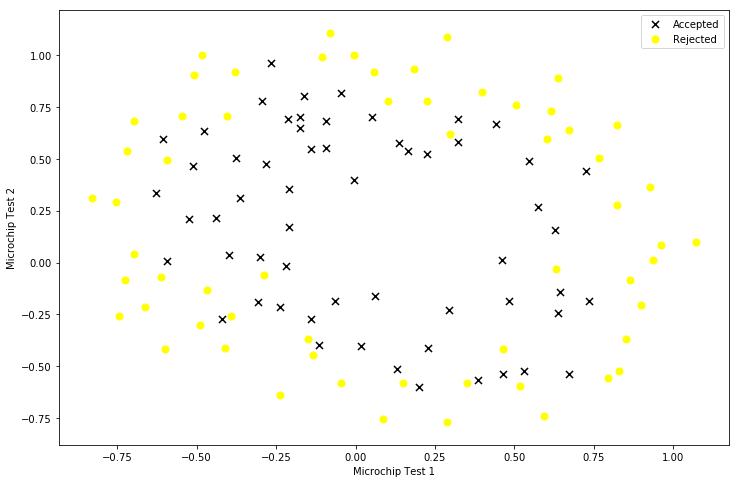

In [7]:
plt.close('all')

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(accepted[:, 0], accepted[:,1], s=50, c='black', marker='x', label='Accepted')  
ax.scatter(rejected[:, 0], rejected[:,1], s=50, c='yellow', marker='o', label='Rejected')  

ax.legend()  
ax.set_xlabel('Microchip Test 1')  
ax.set_ylabel('Microchip Test 2')

plt.show()

## Feature mapping

Uma vez que a Regresão Logística não é um método sofisticado para trabalhar com problemas não-lineares, é necessário criar novas *features* a partir das existentes de modo que seja possível especular a melhor fronteira de decisão obtida a partir das associações entre as duas *features* originais.

In [46]:
"""
    This function returns a new feature array given two features and a degree
    x1 and x2 must be arrays with same size
"""
def map_feature(x1, x2, degree=6):
    map_feature_size = x1.size
    map_feature = np.ones(shape=(map_feature_size, 1))
    
    for i in range(0, degree + 1):
        for j in range(i + 1):
            """ Append values to the end of an array """
            column = (x1 ** (i - j)) * (x2 ** j)
            map_feature = np.append(map_feature, column, axis=1)
        
    return map_feature

In [50]:
x = data[:, :2]

x1 = x[:, [0]]
x2 = x[:, [1]]

maped = map_feature(x1, x2)
print(maped.shape)

(118, 29)
